# First Full Run
    No extra contaminants
    180924 field
    1-P_chance prior

In [16]:
%matplotlib notebook

In [17]:
# imports
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from astropy.table import Table
from astropy import units
from astropy.coordinates import SkyCoord

from frb.associate import bayesian

# Load Sky and FRBs

In [3]:
sky = Table.read('tst_DES_180924.fits')
frbs = Table.read('tst_FRB_180924.fits')

In [14]:
frbs[0:5]

DES_r,ra,dec,iobj,obj_ra,obj_dec,theta
float64,float64,float64,int64,float64,float64,float64
19.58738499726639,325.2840199522759,-40.809129255163334,47578,325.284186,-40.809473,1.4229591462532893
19.883503965871313,325.4491267082537,-41.34527298969795,13026,325.448908,-41.345647,1.354869437609205
20.880999641715785,325.72853231402934,-41.653828544162295,19175,325.728522,-41.653498,1.6412871806252818
19.258669315368255,325.2453963834446,-40.6334153215558,54813,325.245823,-40.633118,1.5820113572493517
19.42883505943663,326.40971727957566,-41.701818635272296,211442,326.409368,-41.701616,1.2115197286530044


# Model assumptions

## FRB localization

In [5]:
sigR = 0.25 * units.arcsec

## Theta prior

In [6]:
theta_u = dict(method='uniform', max=4.) # This is twice what was actually generated

## FOV

In [48]:
fov = 6 * units.arcsec

# Run

In [44]:
model_dict = bayesian.mock_run(sky, frbs, sigR, theta_u, fov)

Working on FRB: 0000
Working on FRB: 0010
Working on FRB: 0020
Working on FRB: 0030
Working on FRB: 0040
Working on FRB: 0050
Working on FRB: 0060
Working on FRB: 0070
Working on FRB: 0080
Working on FRB: 0090


# Explore the model

## Parse model

In [52]:
scale = 1000
mag_lim = 25.5
model_mags = []
model_theta = []
max_PMix = []
#
for key in model_dict.keys():
    # Observed candidates
    for kk, p in enumerate(model_dict[key]['P_Mix']):
        N = int(np.round(p*scale))
        model_mags += [model_dict[key]['cand_mag'][kk]]*N
        model_theta += [model_dict[key]['theta'][kk]]*N
    # Unseen
    N = int(np.round(model_dict[key]['P_Sx']*scale))
    model_mags += [mag_lim]*N
    # Misc
    max_PMix.append(np.max(model_dict[key]['P_Mix']))
    #import pdb; pdb.set_trace()
# Arrays
model_mags = np.array(model_mags)
model_theta = np.array(model_theta)
max_PMix = np.array(max_PMix)

## Magnitudes

In [50]:
bins = np.linspace(19., 25.5, 20)

<IPython.core.display.Javascript object>


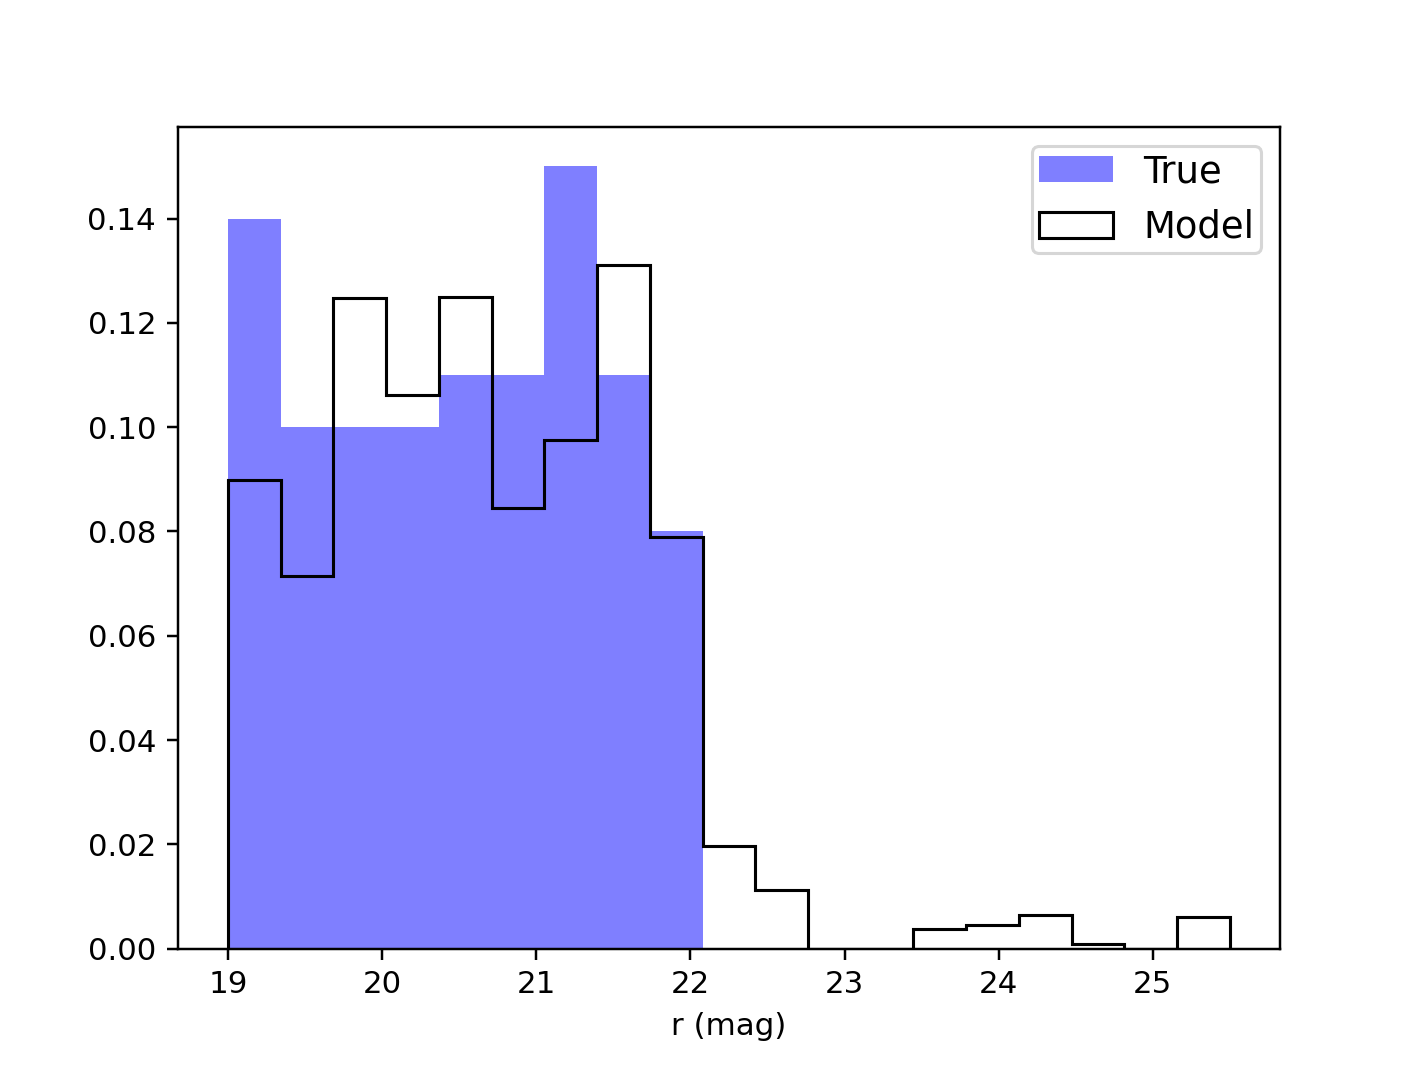

In [51]:
plt.clf()
ax = plt.gca()
# True
weights = np.ones_like(frbs['DES_r'].data)/float(len(frbs))
ax.hist(frbs['DES_r'], weights=weights, bins=bins, color='b', label='True', alpha=0.5)
# Recovered
weights2 = np.ones_like(model_mags)/model_mags.size
ax.hist(model_mags, weights=weights2, bins=bins, color='k', label='Model', histtype='step')
#
ax.set_xlabel('r (mag)')
legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       fontsize='large')
#
plt.show()

## Theta (offsets)

In [40]:
bins_theta = np.linspace(0., 5., 20)

<IPython.core.display.Javascript object>


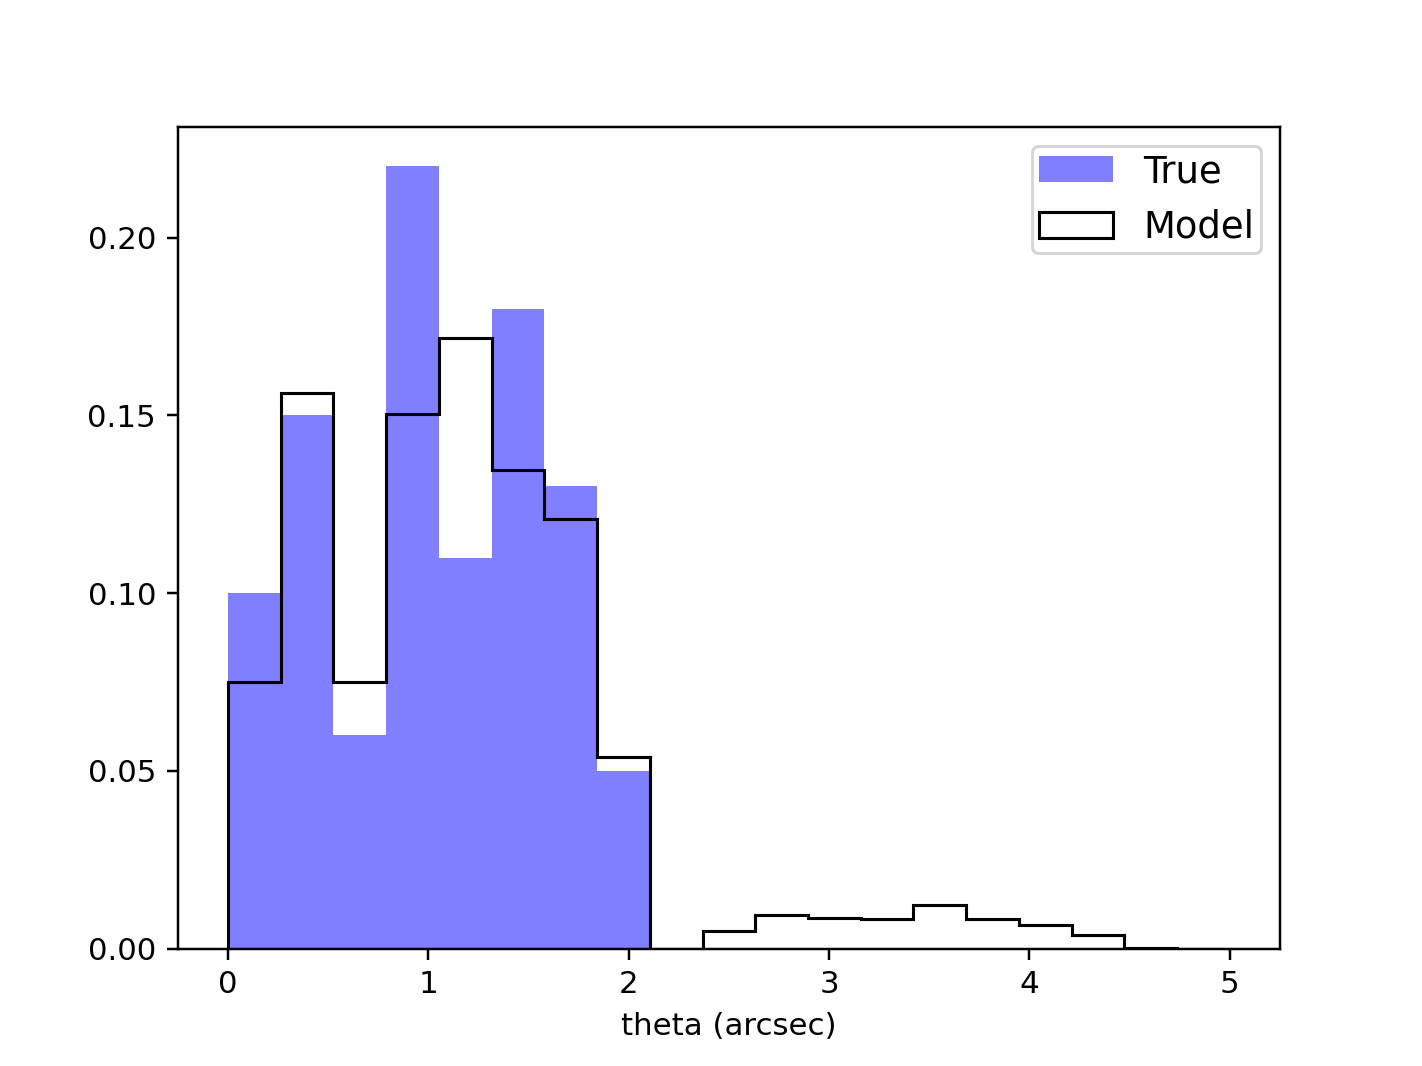

In [41]:
plt.clf()
ax = plt.gca()
# True
weights1 = np.ones_like(frbs['theta'].data)/float(len(frbs))
ax.hist(frbs['theta'], weights=weights1, bins=bins_theta, color='b', label='True', alpha=0.5)
# Recovered
weights2 = np.ones_like(model_theta)/model_theta.size
ax.hist(model_theta, weights=weights2, bins=bins_theta, color='k', label='Model', histtype='step')
#
ax.set_xlabel('theta (arcsec)')
legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       fontsize='large')
#
plt.show()

## Max $P(M_i|x)$

In [56]:
bins_PMi = np.linspace(0., 1., 25)

<IPython.core.display.Javascript object>


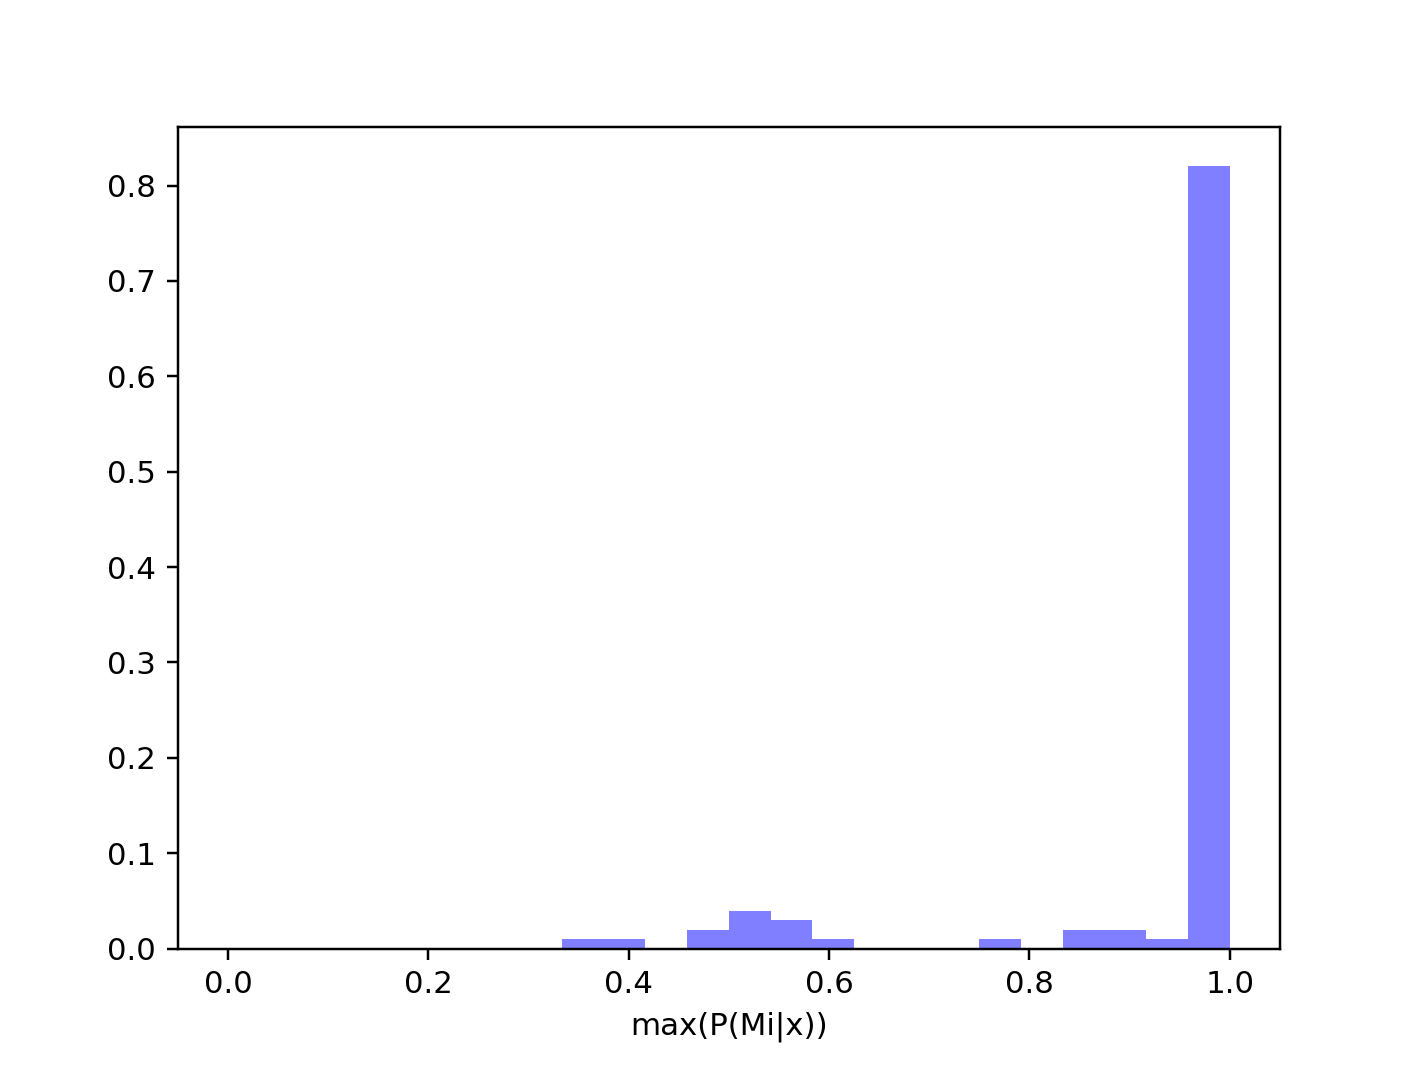

In [58]:
plt.clf()
ax = plt.gca()
# True
weights1 = np.ones_like(max_PMix.data)/max_PMix.size
ax.hist(max_PMix, weights=weights1, bins=bins_PMi, color='b', alpha=0.5)
#
ax.set_xlabel('max(P(Mi|x))')
#ax.set_xlim(0., 1.1)
#legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
#                       fontsize='large')
#
plt.show()

In [60]:
np.sum(max_PMix>0.8)

87